Perform the following operations using Python on Heart Diseases data sets 

a. Data cleaning(Remove NA, ?, Negative values etc.) 

b. Error correcting(Outlier detection and removal) 

c. Data transformation 

d. Build Data model using regression and kNN methods and compare accuracy of heart disease prediction.

In [1]:
import pandas as pd
import numpy as np

In [52]:
data = pd.read_csv("F:\DSBDALExam DataSets\DSBDALExam DataSets\HeartDisease\heart_disease_uci.csv")
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [80]:
data.drop(['id'], axis = 1, inplace = True)

In [54]:
# 1. Data Cleaning

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [55]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [56]:
data['thal'].fillna('normal', inplace = True)

In [57]:
data['ca'].fillna(data['ca'].mean(), inplace = True)

In [58]:
data['slope'].fillna('flat', inplace = True)

In [59]:
data['oldpeak'].fillna(data['oldpeak'].mean(), inplace = True)

In [60]:
data['exang'].fillna(False, inplace = True)

In [61]:
data['thalch'].fillna(data['thalch'].mean(), inplace = True)

In [62]:
data['restecg'].fillna('normal', inplace = True)

In [63]:
data['fbs'].fillna(True, inplace = True)

In [64]:
data['chol'].fillna(data['chol'].mean(), inplace = True)

In [65]:
data['trestbps'].fillna(data['trestbps'].mean(), inplace = True)

In [66]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [29]:
# 2. Error correction and outlier removal

from scipy.stats import zscore

In [33]:
z_scores = zscore(data['trestbps'])

In [34]:
z_scores

array([ 0.69804099,  1.51176059, -0.65815834, -0.1156786 , -0.1156786 ,
       -0.65815834,  0.42680113, -0.65815834, -0.1156786 ,  0.42680113,
        0.42680113,  0.42680113, -0.1156786 , -0.65815834,  2.16273626,
        0.96928086, -1.20063807,  0.42680113, -0.1156786 , -0.1156786 ,
       -1.20063807,  0.96928086, -0.65815834, -0.00718266, -0.1156786 ,
       -0.65815834, -0.65815834,  0.96928086,  0.96928086, -1.20063807,
        0.42680113, -0.82090225,  0.42680113,  0.15556126, -0.1156786 ,
        0.42680113, -0.65815834,  0.96928086, -0.00718266,  0.96928086,
        0.96928086,  0.42680113,  1.51176059,  0.96928086, -0.1156786 ,
       -1.09214212, -1.20063807,  0.96928086,  0.42680113, -0.1156786 ,
       -1.47187793, -0.65815834, -1.09214212, -0.1156786 , -0.1156786 ,
       -0.44116644,  0.42680113, -1.20063807, -0.38691847, -0.38691847,
       -0.1156786 ,  0.53529707, -0.22417455,  0.15556126, -0.65815834,
        0.69804099,  0.42680113,  0.96928086,  2.05424032,  0.96

In [35]:
abs_z_scores = np.abs(z_scores)

In [36]:
abs_z_scores

array([0.69804099, 1.51176059, 0.65815834, 0.1156786 , 0.1156786 ,
       0.65815834, 0.42680113, 0.65815834, 0.1156786 , 0.42680113,
       0.42680113, 0.42680113, 0.1156786 , 0.65815834, 2.16273626,
       0.96928086, 1.20063807, 0.42680113, 0.1156786 , 0.1156786 ,
       1.20063807, 0.96928086, 0.65815834, 0.00718266, 0.1156786 ,
       0.65815834, 0.65815834, 0.96928086, 0.96928086, 1.20063807,
       0.42680113, 0.82090225, 0.42680113, 0.15556126, 0.1156786 ,
       0.42680113, 0.65815834, 0.96928086, 0.00718266, 0.96928086,
       0.96928086, 0.42680113, 1.51176059, 0.96928086, 0.1156786 ,
       1.09214212, 1.20063807, 0.96928086, 0.42680113, 0.1156786 ,
       1.47187793, 0.65815834, 1.09214212, 0.1156786 , 0.1156786 ,
       0.44116644, 0.42680113, 1.20063807, 0.38691847, 0.38691847,
       0.1156786 , 0.53529707, 0.22417455, 0.15556126, 0.65815834,
       0.69804099, 0.42680113, 0.96928086, 2.05424032, 0.96928086,
       1.24052072, 0.38691847, 0.65815834, 1.20063807, 1.20063

In [43]:
new_z = abs_z_scores*100

In [45]:
data['trestbps'].quantile(0.99)

180.0

In [67]:
data.drop(data[data['trestbps'] > 180.0].index, axis = 0, inplace = True)

In [68]:
# Modelling

data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,0


In [70]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])

In [71]:
data['dataset'] = le.fit_transform(data['dataset'])
data['cp'] = le.fit_transform(data['cp'])
data['fbs'] = le.fit_transform(data['fbs'])
data['restecg'] = le.fit_transform(data['restecg'])
data['exang'] = le.fit_transform(data['exang'])
data['slope'] = le.fit_transform(data['slope'])
data['thal'] = le.fit_transform(data['thal'])

In [72]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.000000,233.0,1,0,150.000000,0,2.300000,0,0.000000,0,0
1,2,67,1,0,0,160.000000,286.0,0,0,108.000000,1,1.500000,1,3.000000,1,2
2,3,67,1,0,0,120.000000,229.0,0,0,129.000000,1,2.600000,1,2.000000,2,1
3,4,37,1,0,2,130.000000,250.0,0,1,187.000000,0,3.500000,0,0.000000,1,0
4,5,41,0,0,1,130.000000,204.0,0,0,172.000000,0,1.400000,2,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.000000,333.0,1,2,154.000000,0,0.000000,1,0.676375,1,1
916,917,62,1,3,3,132.132404,139.0,0,2,137.545665,0,0.878788,1,0.676375,1,0
917,918,55,1,3,0,122.000000,223.0,1,2,100.000000,0,0.000000,1,0.676375,0,2
918,919,58,1,3,0,132.132404,385.0,1,0,137.545665,0,0.878788,1,0.676375,1,0


In [73]:
data.corr()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,1.000000,0.236493,0.280676,0.948954,-0.189296,0.045329,-0.371048,0.281459,0.481154,-0.438105,0.163703,0.048926,-0.307292,0.020630,-0.167618,0.271160
age,0.236493,1.000000,0.059625,0.233178,-0.074818,0.238678,-0.079810,0.184208,-0.006194,-0.356579,0.157102,0.249077,-0.077177,0.204765,0.099876,0.335887
sex,0.280676,0.059625,1.000000,0.286462,-0.129970,0.005810,-0.197226,0.114599,0.070459,-0.178390,0.161515,0.111275,-0.112742,0.067431,0.078578,0.268554
dataset,0.948954,0.233178,0.286462,1.000000,-0.150446,0.017395,-0.412022,0.291673,0.462004,-0.382756,0.127668,0.051013,-0.298552,0.009278,-0.144302,0.274532
cp,-0.189296,-0.074818,-0.129970,-0.150446,1.000000,-0.014800,0.065541,-0.057505,-0.075353,0.295472,-0.356219,-0.169799,0.111711,-0.123719,-0.095527,-0.315025
trestbps,0.045329,0.238678,0.005810,0.017395,-0.014800,1.000000,0.104831,0.045888,0.027364,-0.100864,0.140956,0.161300,-0.045116,0.042293,0.056037,0.094656
chol,-0.371048,-0.079810,-0.197226,-0.412022,0.065541,0.104831,1.000000,-0.275710,-0.194888,0.219834,-0.029452,0.040484,0.040274,0.015035,-0.051920,-0.228342
fbs,0.281459,0.184208,0.114599,0.291673,-0.057505,0.045888,-0.275710,1.000000,0.099696,-0.109937,-0.010085,0.018570,-0.047248,0.084212,-0.038351,0.185676
restecg,0.481154,-0.006194,0.070459,0.462004,-0.075353,0.027364,-0.194888,0.099696,1.000000,-0.158824,0.030879,-0.024363,-0.135134,-0.052350,-0.165255,0.039625
thalch,-0.438105,-0.356579,-0.178390,-0.382756,0.295472,-0.100864,0.219834,-0.109937,-0.158824,1.000000,-0.355035,-0.155354,0.294364,-0.143449,-0.055804,-0.354878


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

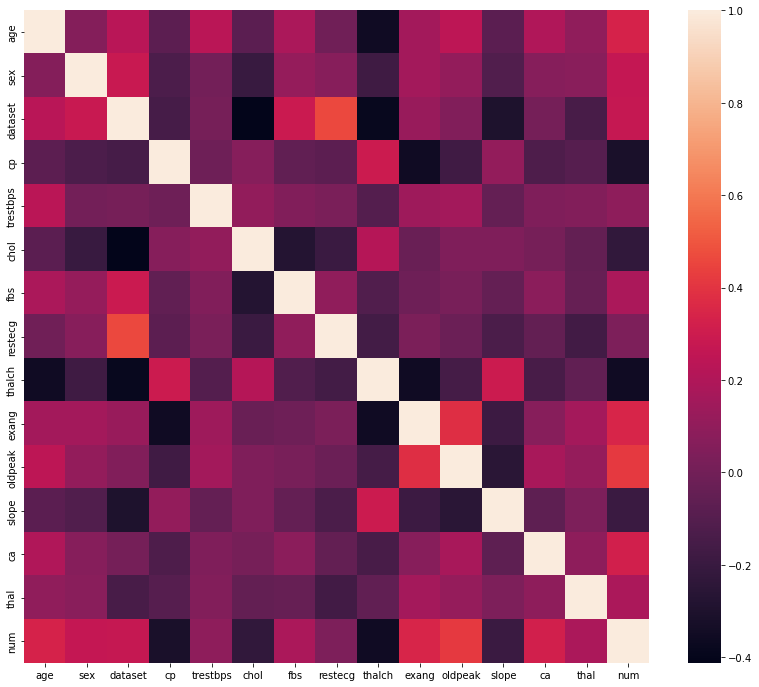

In [81]:
plt.figure(figsize = (14, 12))
sns.heatmap(data.corr());